<a href="https://colab.research.google.com/github/Chien-Klein/Cryptocurrency-Prediction/blob/master/bitcoin_price_prediction_using_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving bitcoin__btc.csv to bitcoin__btc.csv


In [3]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df=pd.read_csv("bitcoin__btc.csv")
print('Data size:', df.shape)
df.head()

Data size: (4704, 19)


,date,transactions,send_usd,hashrate,median_transaction_size,market_cap,active_addresses,median_transaction_value,google_trends,top_100_percent,sent_addresses,mining_profitability,block_size,confirmation_time,fee_reward,tweets,av_transaction_value,av_transaction_size,difficulty
0,1/3/2009,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,204.0,0.0,0.0,0,0.0,0,1.0
1,1/4/2009,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0.0
2,1/5/2009,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0.0
3,1/6/2009,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0.0
4,1/7/2009,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0.0


In [4]:
(num_row, num_column) = df.shape
print('Number of rows: ',num_row)
num_train =  4600
num_test = num_row - num_train

Number of rows:  4704


In [5]:
df = df.replace(r'NaN', np.nan, regex=True)

In [40]:
training_set = df.iloc[:num_train, 5:6].values
test_set = df.iloc[num_train:, 5:6].values
# print(training_set)
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# print(training_set_scaled)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, num_train):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(y_train.shape)

(4540, 60)
(4540,)


In [41]:
print(X_train.shape)
print(y_train.shape)
print(sc)

(4540, 60, 1)
(4540,)
MinMaxScaler()


In [42]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_5 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_6 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_6 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 50)               

In [48]:
# Fitting the RNN to the Training set if the data has never been trained 
import os.path
from os import path
path_name = 'Bitcoin_PricePredict.h5'
if path.exists(path_name):
  print('Data had been trained, loading weights')
  model.load_weights(path_name)
else:
  print('Start training data')
  model.fit(X_train, y_train, epochs = 5
            , batch_size = 32)
  model.save(path_name)

Data had been trained, loading weights


        market_cap
4601  8.426280e+11
4602  8.562620e+11
4603  8.654330e+11
4604  8.439150e+11
4605  8.666120e+11
...            ...
4699  1.229310e+12
4700  1.149380e+12
4701  1.129730e+12
4702  1.114650e+12
4703  1.079230e+12

[103 rows x 1 columns]
        market_cap
4601  8.426280e+11
4602  8.562620e+11
4603  8.654330e+11
4604  8.439150e+11
4605  8.666120e+11
...            ...
4699  1.229310e+12
4700  1.149380e+12
4701  1.129730e+12
4702  1.114650e+12
4703  1.079230e+12

[103 rows x 1 columns]
(103, 60, 1)


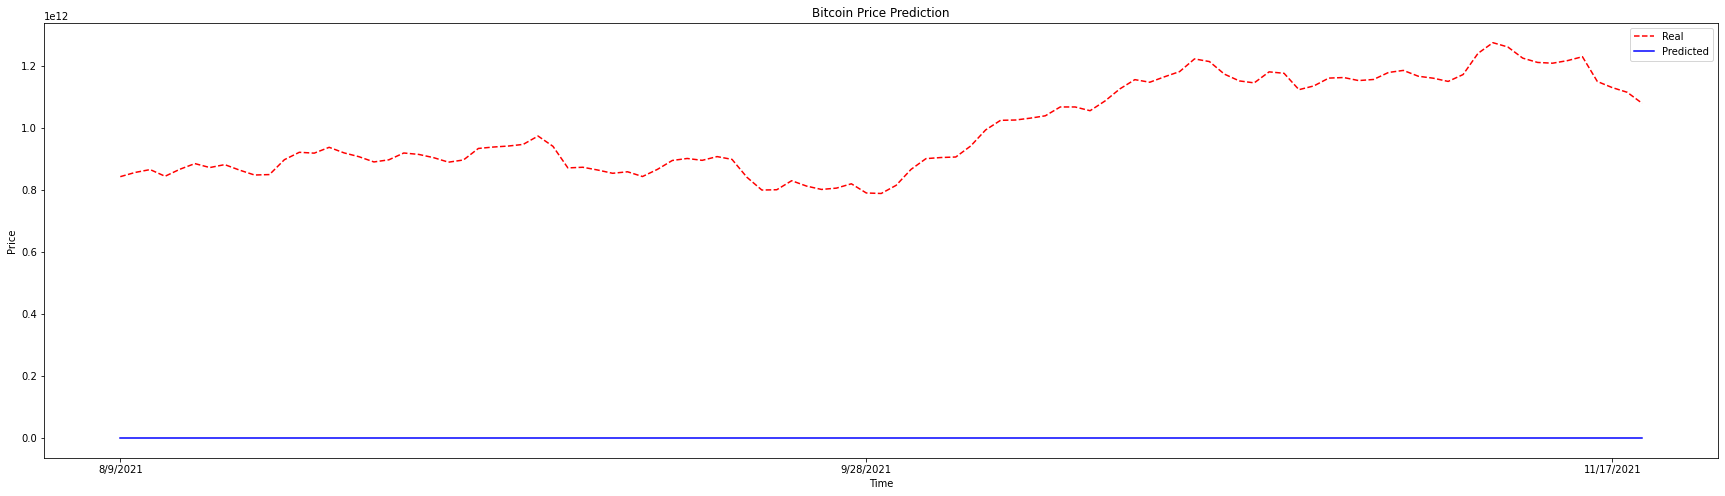

In [39]:
# Getting the predicted 
dataset_train = df.iloc[:num_train, 5:6]
dataset_test = df.iloc[num_train+1:, 5:6]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
abc = dataset_test
print(abc)
print(abc)
inputs = inputs.reshape(-1,1)

inputs = sc.transform(inputs)

X_test = []
for i in range(60, 60 + num_test-1):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

predicted_stock_price = model.predict(X_test)
#print(predicted_stock_price)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
#print('after inverse transform:', predicted_stock_price)
# Visualising the results
plt.figure(figsize=(30,8))
plt.plot(df.loc[num_train+1:, 'date'],dataset_test.values, 'r--', label = 'Real')
plt.plot(df.loc[num_train+1:, 'date'],predicted_stock_price, 'b', label = 'Predicted')
plt.xticks(np.arange(0,num_test,50))
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
#plt.figure(figsize=(1,1))
#plt.rcParams['figure.figsize'] = [10, 5]
plt.show()


In [16]:
MAPE = np.abs(predicted_stock_price - dataset_test.values)
RMSE = np.multiply(MAPE,MAPE)
RMSE = math.sqrt(np.mean(RMSE))/np.mean(dataset_test.values)
MAE = np.mean(MAPE)/np.mean(dataset_test.values)
MAPE = np.divide(MAPE,dataset_test.values)
MAPE = np.mean(MAPE)
print('MAPE = ',MAPE)
print('MAE = ', MAE*100, '%')
print('RMSE = ',RMSE*100, '%')


MAPE =  0.11802882697935421
MAE =  11.593673499019177 %
RMSE =  12.785393805311193 %
